# Lab 00
**Nome: Eduardo Henrique Dias Melgaço**  
**Matrícula: 2017023501**  
As alterações podem ser encontradas no final do notebook  


# Introdução ao Curso e Classificando Instrumentos

**Objetivos**
1. Passar para os discentes qual será o ambiente base que vamos utilizar neste curso
1. Listar quais são as bibliotecas necessárias
1. Um pequeno tutorial de instalação de pacotes

**Resultado Esperado**
1. Um pequeno ambiente com miniconda além das bibliotecas que vamos utilizar
1. Principalmente relevante para discentes que não tem tanto conhecimento de Python

Este notebook deve explorar um pouco do ciclo de trabalho completo do profissional de MIR!

![alt text](fig-0.png)

## Pacotes Necessários


Para seguir os notebooks da matéria você vai precisar de alguns pacotes base em Python. Em particular, sugiro inicialmente uma instalação do [Anaconda](https://www.anaconda.com/products/individual). A distribuição Python Anaconda é uma solução para ciência de dados que já contém boa parte das dependências que precisamos. 

**Além do Anaconda**

Depois de instalar o Anaconda, recomendo que instale ao menos dois pacotes. O LibRosa e o ffmpeg. Para tal, execute o comando abaixo na sua linha de comandos:

```bash
pip install librosa ffmpeg
```

## Imports básicos

Código Python não é tão diferente de outras linguagens. Geralmente vamos precisar de algumas bibliotecas. Para isto, fazemos um import. Abaixo estamos usando:

1. Biblioteca de plots, `matplotlib`
1. Biblioteca de vetores, `numpy`
1. Biblioteca de tabelas `pandas`.

Além dos pacotes acima, este tutorial de hoje também vai fazer uso do [Scikit-Learn](https://scikit-learn.org/). A mesma é a biblioteca de fato de uso de aprendizado de máquina em Python. 

Todas as bibliotecas já devem ter vindo no Anaconda.

Você já deve ter usado algumas dessas no curso de `Álgebra Linear Computacional`. Caso tenha feita o curso em `scilab`, não tem problemas. Python tem uma sintaxe simples que não deve ser problema para um aluno do quarto período. Veja o Capítulo 1/2 do [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

A chamada abaixo apenas configura alguns parâmetros para deixar os plots mais fáceis de ler.

In [2]:
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

plt.ion()

## Librosa

Para importar o [LibRosa](https://librosa.org) basta fazer. O LibRosa é um pacote aberto que serve para realizar processamentos básicos de músicas e sinais em Python. Além do LibRosa, existe o [Essentia](https://essentia.upf.edu/). Este segundo pacote é mais avançado e requer o uso de modelos pré-treinados de Redes Neurais. No momento, vamos nos limitar ao LibRosa. 

Leia a documentação da mesma no link acima.

In [3]:
import librosa

## Arquivos de Música

Antes de executar tarefas de aprendizado de máquina, temos que processar nossos arquivos. Alguns dos passos são demonstrados na figura abaixo.

![alt text](fig-1.png)

Para chegar no nosso objetivo final, acompanhando este Notebook deve vir uma pasta com alguns arquivos de música tanto no formato [AIFF](https://en.wikipedia.org/wiki/Audio_Interchange_File_Format) quanto no formato [WAV](https://en.wikipedia.org/wiki/WAV). No meu computador tive problemas com os arquivos AIFF, por isso faço uso do .wav abaixo.

Para observar os arquivos podemos fazer uso de alguns comandos Unix. Para executar comandos do terminal no Notebook, basta utilizar `!`.

In [4]:
! ls instrument

clarinet   flute      vibraphone violin


In [5]:
! ls instrument/flute

flute.nonvib.ff.B3B4.aiff  flute.nonvib.ff.C6B6.aiff
flute.nonvib.ff.B3B4.wav   flute.nonvib.ff.C6B6.wav
flute.nonvib.ff.C5B5.aiff  flute.nonvib.ff.C7Db7.aiff
flute.nonvib.ff.C5B5.wav   flute.nonvib.ff.C7Db7.wav


Observe como cada pasta contém uma série de arquivos. Vamos tocar um deles. Para tocar arquivos de música bastar fazer uso da chamada:

[IPython.display.Audio](https://ipython.org/ipython-doc/2/api/generated/IPython.lib.display.html)

In [6]:
import IPython.display as ipd
ipd.Audio(filename='instrument/flute/flute.nonvib.ff.B3B4.wav')

In [7]:
import IPython.display as ipd
ipd.Audio(filename='instrument/violin/Violin.arco.ff.sulA.A4B4.mono.wav')

## Observando a forma de onda

Agora podemos prosseguir e observar um pouco qual é a [Forma de onda](https://pt.wikipedia.org/wiki/Forma_de_onda) destes arquivos. Aqui o LibRosa é particularmente útil, pois o mesmo consegue ler o arquivo de dados e nos indicar qual a [taxa de amostragem](https://pt.wikipedia.org/wiki/Amostragem_de_sinal) do mesmo.

Assim como arquivos de vídeo, é necessário fazer uma amostragem do sínal música para um formato digital. A taxa de amostragem nos indica, na média, quantas amostras existem em um segundo.

In [8]:
flute1, sr_flute_1 = librosa.load('instrument/flute/flute.nonvib.ff.B3B4.wav')
sr_flute_1

22050

Observe como a chamada retorna 2 valores. O primeiro é o sinal na forma de um vetor numpy. O segundo é a taxa de amostragem. Cada som na pasta foi amostrado em uma taxa de `22kHz` (22 mil amostras por segundo, já que 1Hz é um ciclo por segundo).

Abaixo vemos o tipo do arquivo de música na memória.

In [9]:
type(flute1)

numpy.ndarray

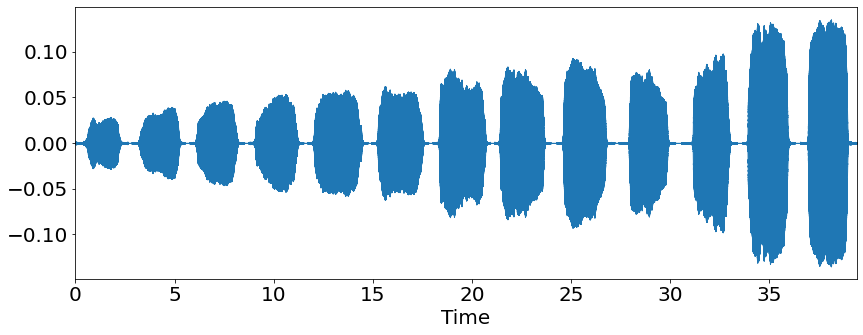

In [10]:
import librosa.display
fig, ax = plt.subplots(1, 1, figsize=(14, 5))
librosa.display.waveplot(flute1, sr=sr_flute_1, ax=ax)

Observe que o nosso vetor tem mais ou menos 86000 quadros, ou posições.

In [11]:
flute1.shape

(869341,)

Como tal música foi amostrada com 22k quadros por segundo, basta fazer `86k/22k` para chegar na duração final. Isto deve ser próximo de 39 segundos, assim como é exemplificado no gráfico acima.

In [12]:
flute1.shape[0] / 22050

39.42589569160998

Vamos comparar com um um violino

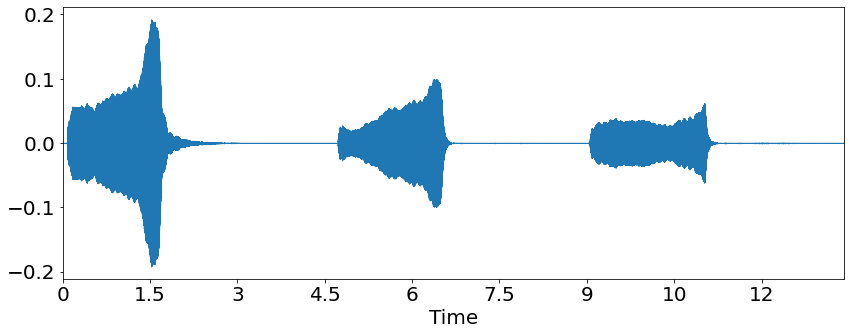

In [13]:
vio1, sr_vio_1 = librosa.load('instrument/violin/Violin.arco.ff.sulA.A4B4.mono.wav')
fig, ax = plt.subplots(1, 1, figsize=(14, 5))
librosa.display.waveplot(vio1, sr=sr_vio_1, ax=ax)

Nossa primeira tenativa de resolver este problema será em usar o vetor musical direto como atributos de um algoritmo de aprendizado de máquina. Com tal objetivo, já podemos observar alguns dos problemas que vamos ter ao fazer o processamento de músicas. 

O primeiro é que dependendo do caso, teremos `869341` atributos. Algo bem irreal de tratar com aprendizado de máquina simples. O segundo, também importante, é que cada arquivo tem uma duração diferente. Tal problema limita, por exemplo, o uso de algoritmos de aprendizado de máquina que necessitam da mesma quantidade de atributos por exemplo.

Tal problema motiva o uso de técnicas de MIR que convertem músicas em atributos mais simples. Assim, podemos aplicar técnicas de aprendizado de máquina. Até o momento no curso não vimos como tais técnicas funcionam, porém neste notebook podemos ter uma noção de qual é o fluxo de trabalho do profissional de MIR.

## Olhando o Espectograma

Para tratar com tais problemas, vamos então extrair atributos do [Espectograma](https://en.wikipedia.org/wiki/Spectrogram) da música. A extração de espectogramas será tratada ainda na primeira parte do curso. Observe os comentários das chamadas abaixo.

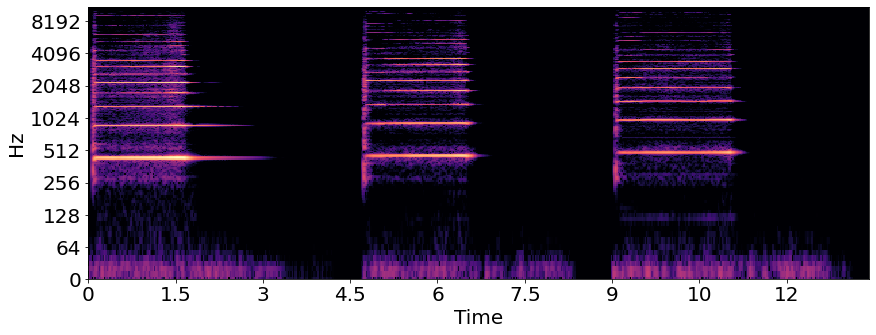

In [14]:
# Faça a transformada de Fourier do sinal. Assim pegamos "a quantidade" de sinal em cada frequência por segundo.
transform = librosa.stft(y=vio1)

# Como a transformada de fourier é um número complexo, multiplique os coeficientes.
S, phase = librosa.magphase(transform)

# Plote o espectograma
fig, ax = plt.subplots(1, 1, figsize=(14, 5))
mesh = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), # intensidade da cor em decibéis
                                y_axis='log', x_axis='time', ax=ax)

Um atributo interessante é o centroide do espectograma. De forma simples, para cada janela de tempo tiramos o centroide da intensidade, convertendo assim o espectograma para um valor simples.

[Text(0.5, 1.0, 'log Power spectrogram')]

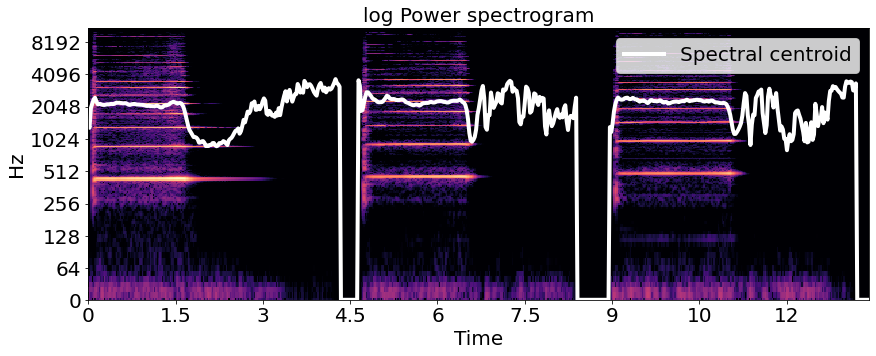

In [15]:
cent = librosa.feature.spectral_centroid(y=vio1)
times = librosa.times_like(cent)
S, phase = librosa.magphase(librosa.stft(y=vio1))

fig, ax = plt.subplots(1, 1, figsize=(14, 5))
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, cent.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram')

Vamos comparar com outro instrumento.

[Text(0.5, 1.0, 'log Power spectrogram')]

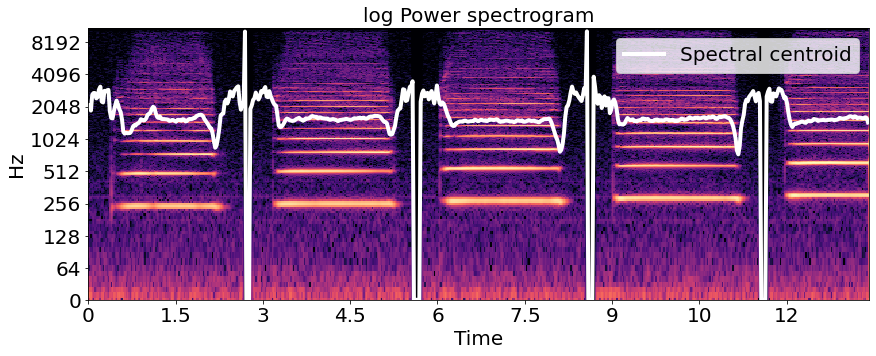

In [16]:
flute_trim = flute1[:len(vio1)] # Cortando a flauta para a mesma quantidade de tempo do violino

cent = librosa.feature.spectral_centroid(y=flute_trim)
times = librosa.times_like(cent)
S, phase = librosa.magphase(librosa.stft(y=flute_trim))

fig, ax = plt.subplots(1, 1, figsize=(14, 5))
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, cent.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram')

## Segmentando

Observe mais uma vez um único arquivo. Uma característica importante do mesmo é que a mesma nota é repetida várias vezes. Isto permite ampliar nossa base de dados caso tais segmentos sejam identificáveis. 

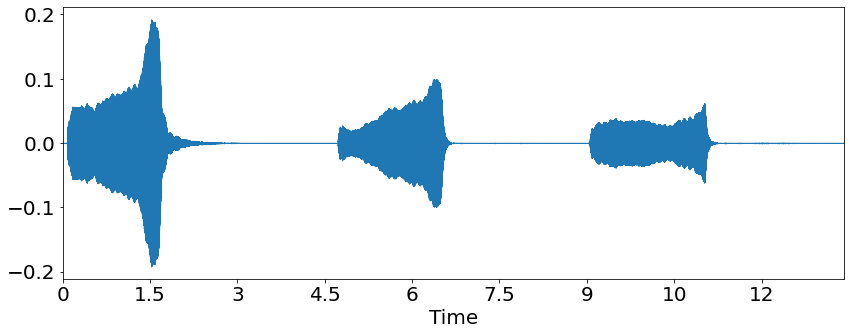

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(14, 5))
librosa.display.waveplot(vio1, sr=sr_vio_1, ax=ax)

Vamos entender quantos elementos são zero e quantos são diferentes de zero. Um fator interessante de numpy é que podemos de forma muito simples criar vetores de booleanos.

In [18]:
is_zero = vio1 == 0
print(is_zero)
print(is_zero.sum())

[ True  True  True ...  True  True  True]
40924


Aqui são os diferentes de zero.

In [19]:
is_zero = vio1 != 0
print(is_zero.sum())

254897


Para mostrar a ideia da segmentação vamos usar um vetor mais simples.

```python
x = np.array([0, 0, 2, 3, 4, 0, 0, 4, 5, 0])
d = np.array(x == 0, dtype='i')
```

O vetor `d` vai ter a seguinte forma:

```array([1, 1, 0, 0, 0, 1, 1, 0, 0, 1], dtype=int32)```

Ou seja, o mesmo vai ser 1 quando o elemento é zero em `x`. Vai ter valor 0 caso contrário.

Agora, observe as diferenças entre elementos consecutivos de `d`:

```
1 - 1 = 0 (isto quer dizer que temos dois zeros lado a lado)
0 - 1 = -1 (isto quer dizer que chegamos em um valor não zero)
1 - 0 = 1 (isto quer dizer que chegamos em um valor não zero)
```

Podemos criar esse vetor de forma simples com o comando `np.diff`.

In [20]:
x = np.array([0, 0, 2, 3, 4, 0, 0, 4, 5, 0])
d = np.array(x == 0, dtype='i')
np.diff(d, prepend=d[0]) # o prepend é para garantir a mesma dimensão de x

array([ 0,  0, -1,  0,  0,  1,  0, -1,  0,  1], dtype=int32)

Em absoluto

In [21]:
bg_ed = np.abs(np.diff(d, prepend=d[0]))

Como `bg_ed[2] == 1`, estamos indicando que algum sinal começa aqui. Olhe se não é verdade em:

```python
x = np.array([0, 0, 2, 3, 4, 0, 0, 4, 5, 0])
```

`x[2] = 2`. Agora, como `bg_ed[5] == 1`, estamos dizendo que o sinal termina em 5. Ou seja, de `[2:5]` é sinal!

`np.where` acha tal sinal!

In [22]:
idx = np.where(bg_ed)[0]
idx

array([2, 5, 7, 9])

Agora basta iterar par a par e achar os segmentos!

**o código até aqui só funciona se o sinal termina em zero, mas ok, dá para entender a ideia**

In [23]:
for i in range(0, len(idx), 2):
    if i + 1 < len(idx):
        bg = idx[i]
        ed = idx[i+1]
        
        print(x[bg:ed])

[2 3 4]
[4 5]


Agora podemos criar nossa função. A heurística acima não é perfeita pois o vetor das notas não é realmente zerado. De qualquer forma, podemos considerar que uma nota toca por pelo menos 1 segundo. Quantos quadros equivalem a um segundo? *A taxa de amostragem!*.

In [24]:
def segment(x, sr=22050):
    x = x.copy()
    x[-1] = 0
    d = np.array(x == 0, dtype='i')
    bg_ed = np.abs(np.diff(d, prepend=d[0]))
    idx = np.where(bg_ed)[0]
    for i in range(0, len(idx), 2):
        if i + 1 < len(idx):
            bg = idx[i]
            ed = idx[i+1]
            cand = x[bg:ed]
            
            if len(cand) >= sr:
                yield cand

Observe como temos várias notas em um único arquivo.

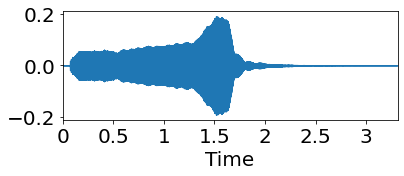

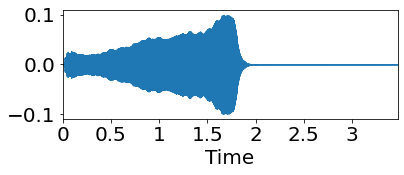

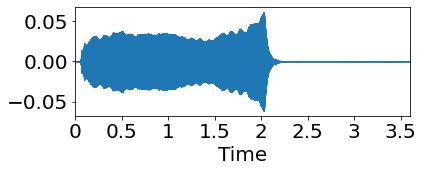

In [25]:
for note in segment(vio1):
    fig, ax = plt.subplots(1, 1, figsize=(6, 2))
    librosa.display.waveplot(note, sr=sr_vio_1, ax=ax)
    plt.show()

In [26]:
# eu não sei pq não funcionou com a flauta :-(
for note in segment(flute1):
    fig, ax = plt.subplots(1, 1, figsize=(6, 2))
    librosa.display.waveplot(note, ax=ax)
    plt.show()

## Um Classificador Ainda sem Entender MIR com Detalhes

### Criando uma Base de Dados

Para começar nossa tarefa de um classificador ultra simples, primeiro temos que ler todo o conjunto de músicas. Aqui, o módulo [Glob](https://docs.python.org/3/library/glob.html) de Python vai ser útil. O mesmo permite uma navegação em todas as pastas de um diretório via expressões regulares.

In [27]:
import glob

Observe a chamada abaixo:
1. Na pasta instrument
1. Entre em quaquer, `*/`, subpasta
1. Além do mais, procure qualquer coisa em `wav`, `*.wav`.

In [28]:
glob.glob('instrument/*/*.wav')

['instrument/violin/Violin.arco.pp.sulG.G3B3.mono.wav',
 'instrument/violin/Violin.arco.mf.sulG.C5F5.mono.wav',
 'instrument/violin/Violin.arco.mf.sulG.C4B5.mono.wav',
 'instrument/violin/Violin.arco.pp.sulD.C6Db6.mono.wav',
 'instrument/violin/Violin.arco.pp.sulD.C5B5.mono.wav',
 'instrument/violin/Violin.arco.mf.sulA.A4B4.mono.wav',
 'instrument/violin/Violin.arco.mf.sulE.C6B6.mono.wav',
 'instrument/violin/Violin.arco.ff.sulA.C5B5.mono.wav',
 'instrument/violin/Violin.arco.mf.sulE.E5B5.mono.wav',
 'instrument/violin/Violin.arco.ff.sulG.C4B4.mono.wav',
 'instrument/violin/Violin.arco.mf.sulA.C6Bb6.mono.wav',
 'instrument/violin/Violin.arco.pp.sulD.D4B4.mono.wav',
 'instrument/violin/Violin.arco.ff.sulA.A4B4.mono.wav',
 'instrument/violin/Violin.arco.ff.sulE.C6B6.mono.wav',
 'instrument/violin/Violin.arco.ff.sulE.E5B5.mono.wav',
 'instrument/violin/Violin.arco.mf.sulA.C5B5.mono.wav',
 'instrument/violin/Violin.arco.pp.sulE.C7E7.mono.wav',
 'instrument/violin/Violin.arco.ff.sulD.D4B4.m

Agora um pouco de magia python para ler tudo. Explicando o código abaixo.

1. Leia o arquivo com LibRosa.
2. Guarde a taxa de amostragem em um conjunto
3. Separe o arquivo por instrumento em um dicionário

Além disso vamos nos limitar a 4 amostras por instrumento (primeiro if).

In [29]:
raw_data = {}
rates = set()
for fpath in glob.glob('instrument/*/*.wav'):
    inst_name = fpath.split('/')[1]
    if inst_name in raw_data and len(raw_data[inst_name]) == 10:
        continue
        
    audio, sr = librosa.load(fpath)
    rates.add(sr)
    
    if inst_name not in raw_data:
        raw_data[inst_name] = []
        
    raw_data[inst_name].append(audio)

Os exemplos tem tamanhos diferentes, já vamos tratar.

In [30]:
for inst in raw_data:
    print(inst)
    for aud in raw_data[inst]:
        print(len(aud))

violin
754399
873152
1994159
431124
1976128
589304
926987
1190781
1018807
1268779
clarinet
681300
302571
709504
591255
vibraphone
30715
24439
22097
28859
24837
21037
25279
20837
24682
21125
flute
117184
743425
682644
869341


Ok, agora vamos extrair o centroide espectral de cada arquivo. Como os arquivos tem tamanhos diferentes, cada centroide também vai ter tamanhos diferentes. Tais tamanhos são definidos pelo tamanho da janela utilizada para fazer a transformada de fourier (novamente, assunto futuro). Vamos observar qual o menor tamanho na base. Parece que é 30!

In [31]:
for inst in raw_data:
    for aud in raw_data[inst]:
        cent = librosa.feature.spectral_centroid(y=aud, sr=22000)
        print(cent.shape)

(1, 1474)
(1, 1706)
(1, 3895)
(1, 843)
(1, 3860)
(1, 1151)
(1, 1811)
(1, 2326)
(1, 1990)
(1, 2479)
(1, 1331)
(1, 591)
(1, 1386)
(1, 1155)
(1, 60)
(1, 48)
(1, 44)
(1, 57)
(1, 49)
(1, 42)
(1, 50)
(1, 41)
(1, 49)
(1, 42)
(1, 229)
(1, 1453)
(1, 1334)
(1, 1698)


Vamos criar um DataFrame pandas sem nada. O mesmo será usado para nosso classificador.

In [32]:
names = ['instrument']
for i in range(30):
    names.append(f'cent_{i}')
df = pd.DataFrame(columns=names)
df

Empty DataFrame
Columns: [instrument, cent_0, cent_1, cent_2, cent_3, cent_4, cent_5, cent_6, cent_7, cent_8, cent_9, cent_10, cent_11, cent_12, cent_13, cent_14, cent_15, cent_16, cent_17, cent_18, cent_19, cent_20, cent_21, cent_22, cent_23, cent_24, cent_25, cent_26, cent_27, cent_28, cent_29]
Index: []

[0 rows x 31 columns]

O código abaixo cola os 30 primeiros valores de cada centroid em uma linha do dataframe.

In [33]:
for inst in raw_data:
    for aud in raw_data[inst]:
        cent = librosa.feature.spectral_centroid(y=aud)
        row = {}
        for i in range(30):
            row[f'cent_{i}'] = cent[0, i]
        row['instrument'] = inst
        df = df.append(row, ignore_index=True)

In [34]:
df

instrument       cent_0       cent_1       cent_2        cent_3  \
0       violin   183.681582   262.663950   364.201615    464.471678   
1       violin     0.000000     0.000000     0.000000      0.000000   
2       violin     0.000000     0.000000     0.000000      0.000000   
3       violin     0.000000     0.000000     0.000000      0.000000   
4       violin     0.000000     0.000000     0.000000      0.000000   
5       violin  2473.252006  1947.848180  2236.386750   2394.994457   
6       violin     0.000000     0.000000     0.000000      0.000000   
7       violin     0.000000     0.000000     0.000000      0.000000   
8       violin  1135.267532  1539.001342  1935.833028   1451.279413   
9       violin     0.000000  1099.358533  1434.120234   1446.451420   
10    clarinet     0.000000     0.000000     0.000000      0.000000   
11    clarinet     0.000000     0.000000     0.000000      0.000000   
12    clarinet     0.000000     0.000000     0.000000      0.000000   
13    clarinet     0.000000     0.000000     0.000000      0.000000   
14  vibraphone  1992.064581  1894.797937  1472.123546   1216.519366   
15  vibraphone  1824.684082  1694.029937  1271.897811   1039.534426   
16  vibraphone  2333.244376  2079.251570  1484.675714    990.774810   
17  vibraphone  2108.966346  2024.807423  1717.843026   1491.405550   
18  vibraphone  2204.306505  2073.862762  1733.289359   1168.792363   
19  vibraphone  2353.883349  2073.529925  1538.805177    869.878886   
20  vibraphone  2239.944492  2129.471744  1708.069675   1181.667181   
21  vibraphone  1601.277322  1362.138004   933.639779    839.076971   
22  vibraphone  1712.767846  1492.584009  1046.560331    951.214549   
23  vibraphone  1530.408993  1405.448831  1142.613927   1013.414419   
24       flute  2759.866509  2696.733730  2362.006968   2342.103259   
25       flute     0.000000     0.000000     0.000000  10269.400727   
26       flute  2685.007593  2592.082458  2441.817147   2524.502381   
27       flute  2055.855559  2123.145863  1882.832788   2641.616678   

         cent_4       cent_5       cent_6       cent_7       cent_8  ...  \
0    557.872535   625.704251   992.791472  1108.237592  1131.211817  ...   
1      0.000000     0.000000     0.000000     0.000000     0.000000  ...   
2      0.000000     0.000000     0.000000     0.000000     0.000000  ...   
3      0.000000     0.000000     0.000000     0.000000     0.000000  ...   
4      0.000000     0.000000     0.000000     0.000000     0.000000  ...   
5   2276.015506  2252.950993  2248.306487  2321.646614  2294.026897  ...   
6      0.000000     0.000000     0.000000     0.000000     0.000000  ...   
7      0.000000     0.000000     0.000000     0.000000     0.000000  ...   
8   1250.288286  1548.536589  2151.673988  1764.498725  1629.725515  ...   
9   1661.508816  1933.879550  1945.170326  1729.042786  1596.389726  ...   
10     0.000000     0.000000     0.000000     0.000000     0.000000  ...   
11     0.000000     0.000000     0.000000     0.000000     0.000000  ...   
12     0.000000     0.000000     0.000000     0.000000     0.000000  ...   
13     0.000000     0.000000     0.000000     0.000000     0.000000  ...   
14  1154.834554  1116.931942  1028.212176   909.358351   831.848871  ...   
15   952.416909   887.258905   791.629424   686.341349   648.864038  ...   
16   876.522576   838.544512   813.796429   797.129607   774.161574  ...   
17  1411.926417  1356.243296  1368.745447  1386.314854  1444.399005  ...   
18   961.521790   850.285522   766.307490   688.104067   597.489011  ...   
19   791.430260   725.787078   696.423659   688.067178   673.599392  ...   
20   999.882922   860.039491   717.699450   650.107715   650.642560  ...   
21   805.711847   777.606839   755.554900   745.297219   741.047437  ...   
22   940.568819   937.559906   931.660139   926.355200   913.933281  ...   
23   972.411362   941.515823   911.706822   868.382605   849.515593  ...   
24  2913.388354  2758.974010  2680.841241  2

### Ufa! Finalmente, vamos classificar!

Agora podemos passar para o o nosso classificador. Observe no código abaixo como **a média das 30 janelas da média do espectograma**, leia isso com calma, é bem diferente para cada instrumento. O código usa pandas para:

1. Selecionar as 4 amostras de cada instrumento.
2. Tirar a média dos valores em cada coluna, a média da média do espectograma.

Tal diferença indica que deve ser possível fazer um trabalho até razoável de classificação com essa base.

In [35]:
for inst in raw_data:
    sub_df = df[df['instrument'] == inst]
    media = sub_df.mean(axis='columns')
    print(inst)
    print(media)
    print()

violin
0    1082.082793
1     743.330484
2     867.774403
3       0.000000
4       0.000000
5    2296.496754
6    1787.104232
7    1276.899906
8    2170.583852
9    1733.222108
dtype: float64

clarinet
10    765.271926
11     52.247478
12      0.000000
13      0.000000
dtype: float64

vibraphone
14    1446.338976
15    1390.385908
16    1306.586949
17    1837.010222
18    1431.617439
19    1222.806082
20    1498.428754
21    1212.229254
22    1111.029622
23    1396.355933
dtype: float64

flute
24    3006.946173
25    2118.381728
26    2176.151612
27    2159.448546
dtype: float64



In [36]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
df.iloc[:, 1:] = scaler.fit_transform(df.iloc[:, 1:])
df

instrument    cent_0    cent_1    cent_2    cent_3    cent_4    cent_5  \
0       violin -0.867807 -0.844385 -0.679949 -0.393887 -0.400534 -0.332078   
1       violin -1.039131 -1.112801 -1.099952 -0.634475 -1.036140 -1.015684   
2       violin -1.039131 -1.112801 -1.099952 -0.634475 -1.036140 -1.015684   
3       violin -1.039131 -1.112801 -1.099952 -0.634475 -1.036140 -1.015684   
4       violin -1.039131 -1.112801 -1.099952 -0.634475 -1.036140 -1.015684   
5       violin  1.267717  0.877700  1.479089  0.606090  1.557012  1.445754   
6       violin -1.039131 -1.112801 -1.099952 -0.634475 -1.036140 -1.015684   
7       violin -1.039131 -1.112801 -1.099952 -0.634475 -1.036140 -1.015684   
8       violin  0.019754  0.459901  1.132485  0.117262  0.388362  0.676153   
9       violin -1.039131  0.010631  0.553901  0.114762  0.856881  1.097155   
10    clarinet -1.039131 -1.112801 -1.099952 -0.634475 -1.036140 -1.015684   
11    clarinet -1.039131 -1.112801 -1.099952 -0.634475 -1.036140 -1.015684   
12    clarinet -1.039131 -1.112801 -1.099952 -0.634475 -1.036140 -1.015684   
13    clarinet -1.039131 -1.112801 -1.099952 -0.634475 -1.036140 -1.015684   
14  vibraphone  0.818904  0.823488  0.597727 -0.004339  0.279608  0.204608   
15  vibraphone  0.662785  0.618324  0.366823 -0.096014  0.048986 -0.046319   
16  vibraphone  1.137129  1.011981  0.612202 -0.121271 -0.037484 -0.099541   
17  vibraphone  0.927941  0.956345  0.881095  0.138047  0.572523  0.466065   
18  vibraphone  1.016866  1.006474  0.898908 -0.029061  0.059359 -0.086714   
19  vibraphone  1.156379  1.006134  0.674625 -0.183893 -0.134433 -0.222733   
20  vibraphone  1.050106  1.063301  0.869824 -0.022392  0.103066 -0.076057   
21  vibraphone  0.454410  0.279164 -0.023262 -0.199848 -0.118161 -0.166118   
22  vibraphone  0.558399  0.412467  0.106960 -0.141762  0.035487  0.008637   
23  vibraphone  0.388310  0.323424  0.217731 -0.109544  0.071766  0.012959   
24       flute  1.535047  1.642984  1.623957  0.578694  2.283196  1.998604   
25       flute -1.039131 -1.112801 -1.099952  4.684895  1.134089  1.410692   
26       flute  1.465225  1.536041  1.715995  0.673173  1.576920  1.888397   
27       flute  0.878403  1.056836  1.071364  0.733836  2.084751  1.977382   

      cent_6    cent_7    cent_8  ...   cent_20   cent_21   cent_22   cent_23  \
0   0.073231  0.241662  0.268812  ... -0.131427 -0.276841 -0.425170 -0.396320   
1  -1.028121 -1.009944 -0.988881  ...  0.269191  0.123916  0.061307  0.015558   
2  -1.028121 -1.009944 -0.988881  ...  0.099066  0.044831 -0.114877 -0.149964   
3  -1.028121 -1.009944 -0.988881  ... -1.502821 -1.628201 -1.666716 -1.720053   
4  -1.028121 -1.009944 -0.988881  ... -1.502821 -1.628201 -1.666716 -1.720053   
5   1.466034  1.612046  1.561643  ...  0.903826  0.777608  0.747659  0.700361   
6  -1.028121 -1.009944 -0.988881  ...  2.435541  2.665816  2.615873  2.581920   
7  -1.028121 -1.009944 -0.988881  ...  0.695446  0.430906  0.434606  0.424746   
8   1.358835  0.982821  0.823065  ...  1.003660  1.102501  1.110246  1.091445   
9   1.129750  0.942779  0.786002  ...  0.635174  0.470610  0.353460  0.264803   
10 -1.028121 -1.009944 -0.988881  ... -1.502821  0.283911  0.331590  0.276898   
11 -1.028121 -1.009944 -0.988881  ... -1.502821 -1.628201 -1.666716 -1.720053   
12 -1.028121 -1.009944 -0.988881  ... -1.502821 -1.628201 -1.666716 -1.720053   
13 -1.028121 -1.009944 -0.988881  ... -1.502821 -1.628201 -1.666716 -1.720053   
14  0.112525  0.017055 -0.064023  ...  0.181667  0.079116  0.150806  0.176439   
15 -0.149928 -0.234813 -0.267467  ...  0.225585  0.136169  0.155911  0.227010   
16 -0.125337 -0.109693 -0.128160  ... -0.469865 -0.397250 -0.150011  0.180953   
17  0.490295  0.555713  0.617017  ...  0.589196  0.575515  0.598321  0.543670   
18 -0.178019 -0.232823 -0.324586  ...  0.344460  0.316671  0.375417  0.389924   
19 -0.255544 -0.232864 -0.239966  ... -0.562388 -0.587403 -0.441080 -0.233686   
20 -0.231942 -0.275734 -0.265490  ...  0

Vamos gerar X e y

In [37]:
cat = pd.Categorical(df['instrument'])
y = cat.codes
X = df.iloc[:, 1:].values

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.50)

Finalmente e por fim, vamos de Sklearn!

In [39]:
from sklearn.linear_model import LogisticRegressionCV

In [47]:
model = LogisticRegressionCV(multi_class='ovr')
model = model.fit(X_train, y_train)

/Users/eduardo.melgaco/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [45]:
model.predict(X_test)

array([2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 2, 3], dtype=int8)

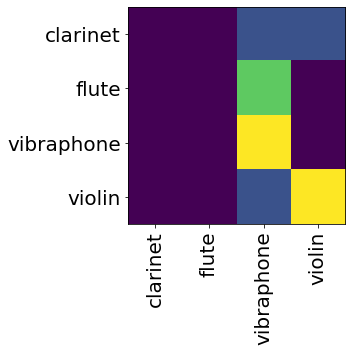

In [49]:
from sklearn.metrics import confusion_matrix
plt.imshow(confusion_matrix(y_test, model.predict(X_test)))
plt.xticks([0, 1, 2, 3], cat.categories, rotation=90)
plt.yticks([0, 1, 2, 3], cat.categories);

## Tarefas

1. Altere o código acima para extrair mais features usando LibRosa
1. Compare outros classificadores via SKLearn
1. Adicione mais exemplos
   1. Aqui você pode pegar diferentes partes de um mesmo áudio para aumentar a base

### Utilizando SVM ao invés de Linear regression

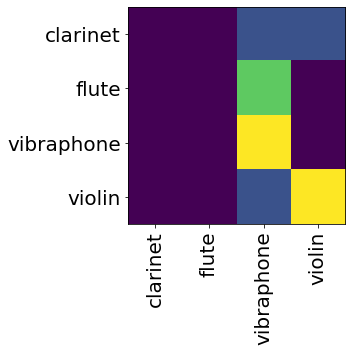

In [52]:
from sklearn.svm import LinearSVC
model = LinearSVC()
model = model.fit(X_train, y_train)
model.predict(X_test)
from sklearn.metrics import confusion_matrix
plt.imshow(confusion_matrix(y_test, model.predict(X_test)))
plt.xticks([0, 1, 2, 3], cat.categories, rotation=90)
plt.yticks([0, 1, 2, 3], cat.categories);

Acima é possível perceber que o SVM obteve o mesmo resultado que o classificador por regressão linear. Então podemos concluir que a performance pode ser atribuída à escassez de dados retirados à partir dos centróides. 

---
### Utilizando MFCC com SVM
À seguir iremos utilizar uma feature chamada MFCC (Mel Frequency Cepstral Co-efficients) que é uma feature que descreve o formato dos segmentos de espectro. Abaixo iremos percorrer o MFCC de cada instrumento e checar o formato do array de cada um deles:

In [91]:
for inst in raw_data:
    for aud in raw_data[inst]:
        mfcc = librosa.feature.mfcc(y=aud, sr=22000)
        print(mfcc.shape)

(20, 1474)
(20, 1706)
(20, 3895)
(20, 843)
(20, 3860)
(20, 1151)
(20, 1811)
(20, 2326)
(20, 1990)
(20, 2479)
(20, 1331)
(20, 591)
(20, 1386)
(20, 1155)
(20, 60)
(20, 48)
(20, 44)
(20, 57)
(20, 49)
(20, 42)
(20, 50)
(20, 41)
(20, 49)
(20, 42)
(20, 229)
(20, 1453)
(20, 1334)
(20, 1698)


É possível perceber que o tamanho mínimo do MFCC é 41, então utilizaremos a mesma técnica utilizada acima e criaremos um dataset à partir da seleção das 41 primeiras features destes arrays.

In [92]:
names = ['instrument']
for i in range(30):
    names.append(f'mfcc_{i}')
df = pd.DataFrame(columns=names)

for inst in raw_data:
    for aud in raw_data[inst]:
        mfcc = librosa.feature.mfcc(y=aud, sr=22000)
        row = {}
        for i in range(41):
            row[f'mfcc_{i}'] = mfcc[0, i]
        row['instrument'] = inst
        df = df.append(row, ignore_index=True)
        
        
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
df.iloc[:, 1:] = scaler.fit_transform(df.iloc[:, 1:])
df

instrument    mfcc_0    mfcc_1    mfcc_2    mfcc_3    mfcc_4    mfcc_5  \
0       violin -1.011947 -1.055429 -0.785974 -0.389671 -0.296449 -0.266786   
1       violin -0.905123 -0.924570 -1.012327 -1.076629 -1.182288 -1.220442   
2       violin -0.801425 -0.817008 -0.878710 -0.920324 -1.011625 -1.040806   
3       violin -1.510354 -1.552355 -1.792182 -1.988907 -2.178366 -2.268889   
4       violin -0.463110 -0.466086 -0.442783 -0.410374 -0.454832 -0.454740   
5       violin -1.411459 -1.325223 -1.358233 -1.460570 -0.307163  0.414684   
6       violin -0.706997 -0.719061 -0.757037 -0.777989 -0.856216 -0.877227   
7       violin -0.775466 -0.790082 -0.845261 -0.881195 -0.968902 -0.995837   
8       violin -0.523978 -0.372431 -0.300888 -0.339165 -0.451276 -0.487791   
9       violin -0.338192 -0.336512  0.369557  1.068329  1.408541  1.563473   
10    clarinet -0.387517 -0.387675 -0.345378 -0.296429 -0.330421 -0.323788   
11    clarinet -0.999248 -1.022203 -1.133610 -1.218506 -1.337198 -1.383497   
12    clarinet -0.697795 -0.709516 -0.745180 -0.764119 -0.841072 -0.861286   
13    clarinet -0.310520 -0.307808 -0.246165 -0.180370 -0.203700 -0.190405   
14  vibraphone  1.325553  1.270123  1.109560  1.130573  1.083412  1.001856   
15  vibraphone  1.230377  1.147365  1.003034  1.112023  1.110210  1.056848   
16  vibraphone  1.273079  1.333082  1.392360  1.288706  1.243054  1.240900   
17  vibraphone  1.352647  1.311362  1.220149  1.278291  1.284391  1.257353   
18  vibraphone  1.173257  1.316629  1.475386  1.253021  1.244665  1.199428   
19  vibraphone  1.256527  1.417834  1.600021  1.282585  1.203554  1.145172   
20  vibraphone  1.343777  1.343109  1.276773  1.097096  1.009120  0.898431   
21  vibraphone  1.291863  1.204721  0.983858  0.954579  0.875434  0.804875   
22  vibraphone  1.301816  1.215821  0.997298  0.979877  0.910816  0.789361   
23  vibraphone  1.337941  1.296898  1.246829  1.198498  1.141628  1.049631   
24       flute -0.376526 -0.372487 -0.323669 -0.277613 -0.316890 -0.307304   
25       flute -0.591491 -0.599250 -0.608204 -0.603884 -0.623372 -0.557348   
26       flute -0.316350 -0.319163 -0.258054 -0.197157 -0.212752 -0.199621   
27       flute -0.759337 -0.780086 -0.841169 -0.860675 -0.942304 -0.986246   

      mfcc_6    mfcc_7    mfcc_8  ...   mfcc_31   mfcc_32   mfcc_33   mfcc_34  \
0  -0.058792  0.238323  0.387859  ...  0.316309  0.421049  0.427306  0.304830   
1  -1.251634 -1.283086 -1.306267  ...  0.467218  0.465050  0.413948  0.345658   
2  -1.060229 -1.077660 -1.085509  ...  0.898982  0.864461  0.931109  0.923340   
3  -2.368770 -2.482059 -2.594725  ... -3.375885 -3.382077 -3.342389 -3.397817   
4  -0.435767 -0.407452 -0.365280  ... -0.644096 -0.668220 -0.640625 -0.483602   
5   0.733767  0.758995  0.612019  ...  0.249306  0.239675  0.234355  0.169076   
6  -0.885933 -0.890595 -0.884483  ...  0.749954  0.693184  0.631772  0.617922   
7  -1.012314 -1.026234 -1.030245  ...  0.454573  0.360688  0.261791  0.268201   
8  -0.420049 -0.358549 -0.304597  ... -0.408977 -0.407934 -0.369600 -0.363075   
9   1.545237  1.431001  1.481061  ...  1.967484  1.905769  1.866830  1.835424   
10 -0.296236 -0.257699 -0.204350  ... -0.210953  0.361294  0.805667  1.007508   
11 -1.425371 -1.469550 -1.506648  ... -0.985823 -1.047125 -1.174024 -1.037779   
12 -0.868948 -0.872366 -0.864893  ... -1.256283 -1.276389 -1.255303 -1.174878   
13 -0.154115 -0.105166 -0.040433  ... -0.246055 -0.272792 -0.262662 -0.275216   
14  0.927827  0.820516  0.752307  ... -0.585948 -0.617180 -0.634364 -0.673962   
15  1.011711  0.982827  0.937869  ... -0.557306 -0.593134 -0.611806 -0.644055   
16  1.254733  1.283428  1.233117  ... -0.202603 -0.237647 -0.260461 -0.293038   
17  1.239211  1.233241  1.227733  ... -0.404061 -0.445986 -0.474443 -0.511524   
18  1.167567  1.131377  0.989816  ... -0.342335 -0.375907 -0.406621 -0.421830   
19  1.078384  1.043198  0.995304  ... -0.084255 -0.120822 -0.149220 -0.169001   
20  0.790482  0.702948  0.679803  ... -0

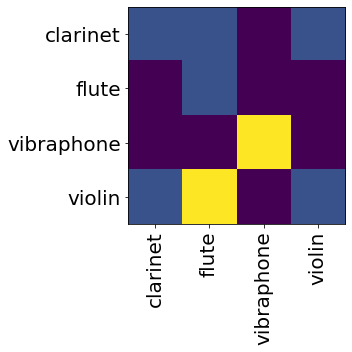

In [105]:
cat = pd.Categorical(df['instrument'])
y = cat.codes
X = df.iloc[:, 1:].values
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.50, random_state=42)
model = LinearSVC()
model = model.fit(X_train, y_train)
model.predict(X_test)
from sklearn.metrics import confusion_matrix
plt.imshow(confusion_matrix(y_test, model.predict(X_test)))
plt.xticks([0, 1, 2, 3], cat.categories, rotation=90)
plt.yticks([0, 1, 2, 3], cat.categories);

À partir da análise da matriz de confusão podemos perceber que o modelo teve uma performance inferior ao modelo que utiliza centroids, falhando para classificar as classes corretas (True positives) e gerando uma alta taxa de erro (false positives).

## Referências

O notebook acima foi inspirado no curso da MTG.

1. https://github.com/MTG/MIRCourse/blob/master/notebooks/Lecture1_IntroWithACaseStudy.ipynb